# Project: `Engineering Graduate Salary Prediction`


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#corr">Correlation between features</a></li>
<li><a href="#Machine">Machine Learning Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**
Engineering Graduates in India
India has a total 6,214 Engineering and Technology Institutions in which around 2.9 million students are enrolled. Every year on an average 1.5 million students get their degree in engineering, but due to lack of skill required to perform technical jobs less than 20 percent get employment in their core domain. [source of information: BWEDUCATION]

### Analysis of the DataSet (questions that is analyized in the dataset):
**Objective:**

Relevant question are:

>1-what determines the salary and the jobs these engineers are offered right after graduation. 
>
>2-Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. 
>
>3-On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

### **Data Description:**
><li>ID: A unique ID to identify a candidate</li>
>
><li>Salary: Annual CTC offered to the candidate (in INR)</li>
><li>Gender: Candidate's gender</li>
><li>DOB: Date of birth of the candidate</li>
><li>10percentage: Overall marks obtained in grade 10 examinations</li>
><li>10board: The school board whose curriculum the candidate followed in grade 10</li>
><li>12graduation: Year of graduation - senior year high school</li>
><li>12percentage: Overall marks obtained in grade 12 examinations</li>
><li>12board: The school board whose curriculum the candidate followed</li>
><li>CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate</li>
><li>CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.</li>
><li>Degree: Degree obtained/pursued by the candidate</li>
><li>Specialization: Specialization pursued by the candidate</li>
><li>CollegeGPA: Aggregate GPA at graduation</li>
><li>CollegeCityID: A unique ID to identify the city in which the college is located in.</li>
><li>CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.</li>
><li>CollegeState: Name of the state in which the college is located</li>
><li>GraduationYear: Year of graduation (Bachelor's degree)</li>
><li>English: Scores in AMCAT English section</li>
><li>Logical: Score in AMCAT Logical ability section</li>
><li>Quant: Score in AMCAT's Quantitative ability section</li>
><li>Domain: Scores in AMCAT's domain module</li>
><li>ComputerProgramming: Score in AMCAT's Computer programming section</li>
><li>ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section</li>
><li>ComputerScience: Score in AMCAT's Computer Science section</li>
><li>MechanicalEngg: Score in AMCAT's Mechanical Engineering section</li>
><li>ElectricalEngg: Score in AMCAT's Electrical Engineering section</li>
><li>TelecomEngg: Score in AMCAT's Telecommunication Engineering section</li>
><li>CivilEngg: Score in AMCAT's Civil Engineering section</li>
><li>conscientiousness: Scores in one of the sections of AMCAT's personality test</li>
><li>agreeableness: Scores in one of the sections of AMCAT's personality test</li>
><li>extraversion: Scores in one of the sections of AMCAT's personality test</li>
><li>nueroticism: Scores in one of the sections of AMCAT's personality test</li>
><li>openess_to_experience: Scores in one of the sections of AMCAT's personality test</li>
**Note: **To give you more context AMCAT is a job portal.

### **Overview**

we will try to uncover the factors that affect an Indian engineering graduate’s salary and subsequently select only relevant categories that have high impact on the salary. The cleaned data will be ready for any regression algorithm to be used which can predict the salary.

In [133]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate

<a id="cleaning"></a>
## **Data Cleaning**


> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions. We will start with standard properties of the cleaning the dataset

### Questions that proved with answers:
>1- If data is empty of missing values ?
>
>2- Are columns affect on the main reason of using dataset?
>
>3- we should find the data has duplicated values?

In [134]:
df = pd.read_csv('Engineering_graduate_salary.csv')
print("Dimensions of DF: ", df.shape)
print("\nInformation about DF: ")
print(df.info())
print("\nHead of DF: \n", df.head(5))

Dimensions of DF:  (2998, 34)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  Co

`First insight:`

As you can see this dataset is fully with values and no missing values in it.

####  Now lets analyze the data and get basic overview of what we’re dealing with:

In [135]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

Now if we observe carefully, there are some columns that obviously do not affect salaries like 'ID' , 'DOB', boards of 10th and 12th and so on. We will get rid of these redundant columns.

In [136]:
df = df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'GraduationYear','10board', '12board' , 'CollegeState','CollegeCityID', 'CollegeCityTier',],axis = 1)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


`Second insight:`

Already we drop 10 columns that we saw they did not a shape of interest as we predict the salary.

In [137]:
df.duplicated().sum()

0

`Third insight:`

No duplicated values ,too.

we see that there are no duplicates to take care of

In [138]:
df.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

If we observe this, we can understand that there are a lot of single values which can unnecessarily affect the model if we try to train it using this data. Let’s group this data together as they’re not adding much value to the 'tion' as a whole.

In [139]:
specialization = df.Specialization.value_counts() 
lessthan10 = specialization[specialization<=10]
lessthan10
def correctSpecialization(val):
    if val in lessthan10:
        return 'Others'
    else:
        return val
df['Specialization'] = df['Specialization'].apply(correctSpecialization)
df['Specialization'].value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

This data seems like something we can work with.

In [140]:
df.shape

(2998, 24)

In [141]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


If we observe we can see that GPA has max value 99.93 and min value 6.63 which is a big range and 6.63 probably is 

some wrong value. We don’t know that yet! But, something seems definitely wrong! Let’s analyze this and see if we can 

get rid of the outliers if any.

so, we start working with visulizations to show the relationships between features.

<a id="#eda"></a>

## **Exploratory Data Analysis**

>**Tip:** How to implement the whole operations and functions while analysing the dataset by using
>visulization plots finding relationships and statistc calculations that are providing in this section

### Relivent questions:

> 4-How we can detect the outliers in a feature and it must delete it?
>
> 5-Are there any relationships between features?
>
> 6-Is there any state of linearity if found between 2 features?
>
> 7-Try to make a visualized plot to predict which values are effected by other features?

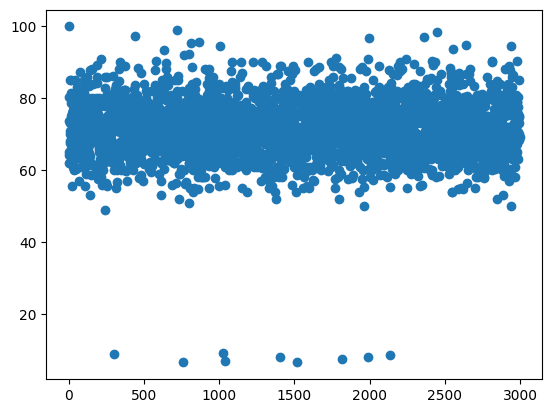

In [142]:
plt.scatter(df.index,df['collegeGPA'])

`Forth insight:`

This plot clearly shows that the values mostly lie in 50–100 range and we can safely drop values less than 20 which can introduce unnecessary bias.

In [143]:
df = df[(df['collegeGPA'] > 40)]
df

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,505,485,445,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,f,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,345,585,395,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,m,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,385,425,485,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,m,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,465,645,505,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


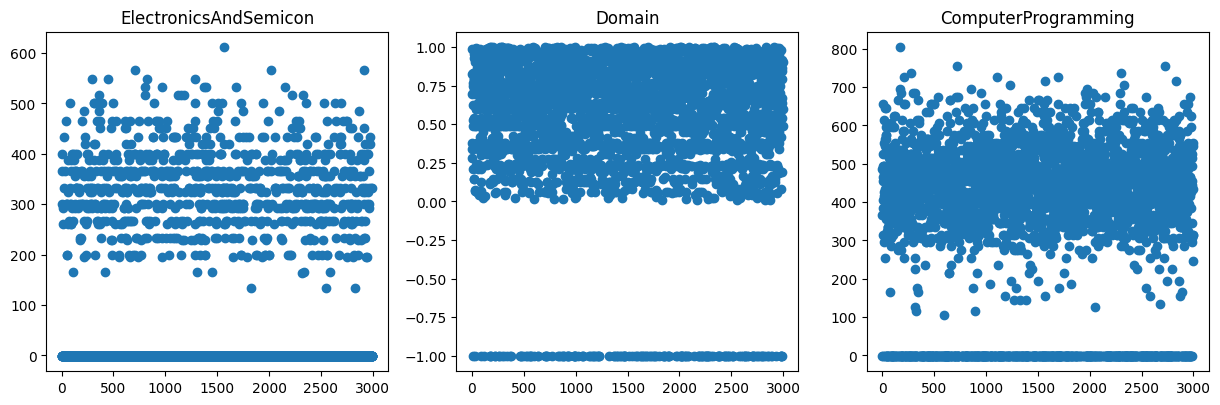

In [144]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')
plt.subplot(3,3,2)
plt.scatter(df.index, df.Domain)
plt.title('Domain')
plt.subplot(3,3,3)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')
plt.show()

In [145]:
# df = df.replace(-1,np.nan)
# cols_with_nan = [col for col in df.columns if df.isna().sum()[col]>0]
# for col in cols_with_nan:
#     df[col] = df[col].fillna(df[col].mean())
# df

I’ve replaced the -1 values with nan first then replaced all those with the mean values of those columns.

Now if we compare this with original data, we can definitely observe that our new data is much more clean and 
workable with. It contains values that are uniform and affect the salary in some way.

<Axes: xlabel='count', ylabel='Gender'>

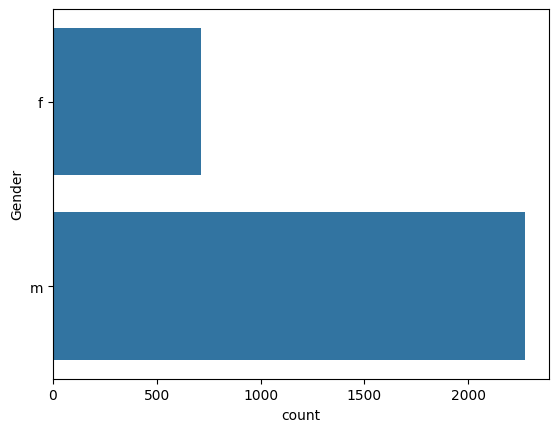

In [146]:
sns.countplot(df.Gender)

`Fifth insight:`

Females are more than males 4 times almost.

<Axes: ylabel='10percentage'>

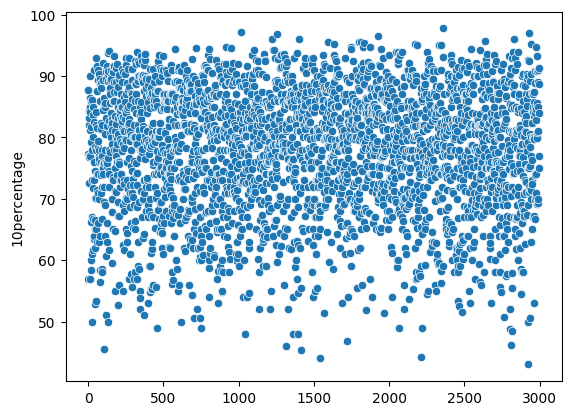

In [147]:
sns.scatterplot(df['10percentage'])#,df['12percentage'])

`Sixth insight:`

Clearly, a linearity can be seen here between 10th and 12th percentage.

In [148]:
plt.figure(figsize = (8,4))
sns.scatterplot(df.collegeGPA,df.Salary, hue = df.Degree)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 800x400 with 0 Axes>

`Seventh insight:`

Here, we can observe that mostly B.Tech/B.E. students are getting jobs with higher salaries. Similarly other columns can be compared with salary.

In [ ]:
plt.style.use('seaborn-white')

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:ylabel='Degree'>

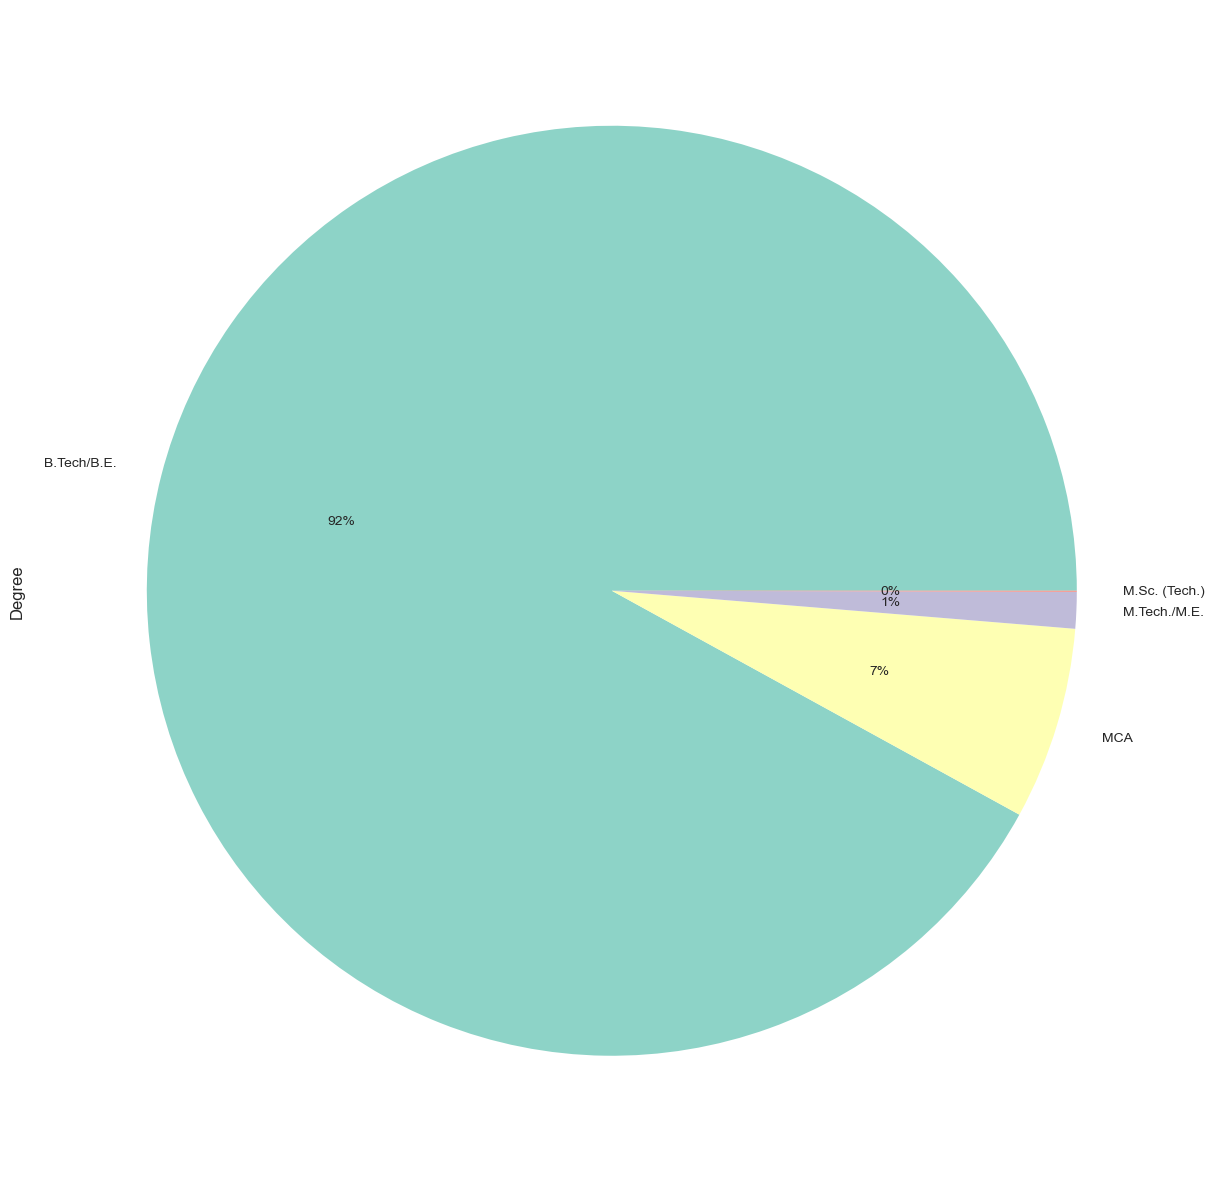

In [ ]:
plt.figure(figsize = (15,20))
df['Degree'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

we see that the B.Tech/B.E is already has the most percentage.

Now let us see if there is any relation between `‘openess_to_experience’` and `salary`. It can be observed that higher scores graduates get higher salaries.

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='openess_to_experience', ylabel='Salary'>

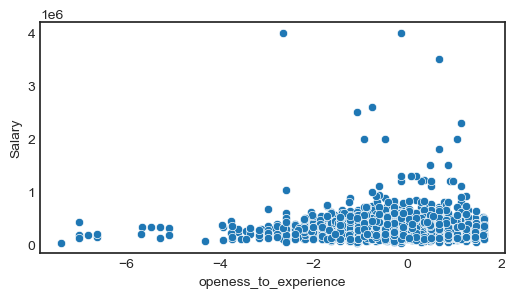

In [ ]:
plt.figure(figsize = (6,3))
sns.scatterplot(df.openess_to_experience,df.Salary)

and then we will make some calculations for each feature in the dataset to gather all information that we need.

As example i need to know the quartile and boxplot:

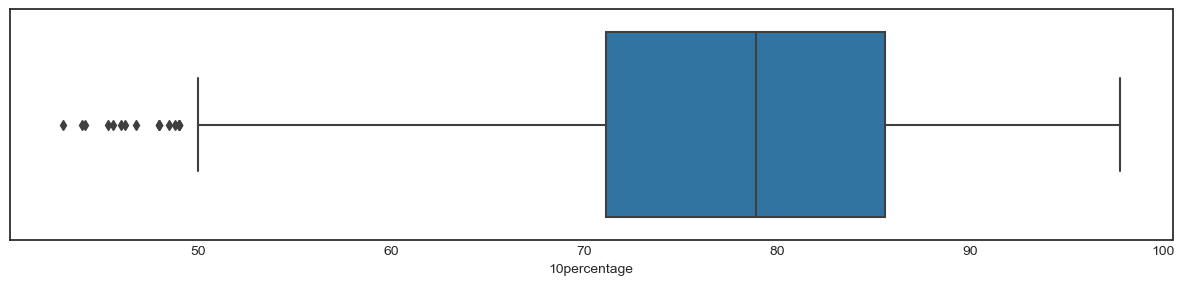

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df['10percentage'])
plt.show()

In [ ]:
lower_limit = 72 - 1.5 * 14.4
lower_limit

50.4

In [ ]:
df['10percentage']=df["10percentage"].map(lambda x:51 if x <51 else x)
df['10percentage'].head()

0    87.80
1    57.00
2    77.33
3    84.30
4    82.00
Name: 10percentage, dtype: float64

<AxesSubplot:xlabel='12percentage'>

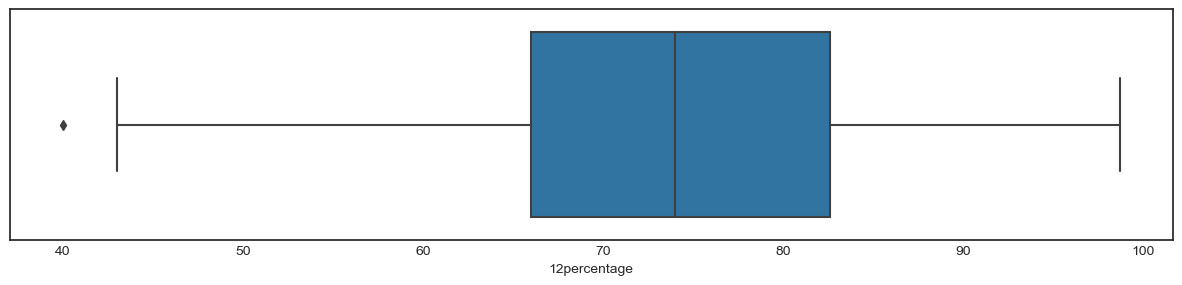

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(x=df['12percentage'])

In [ ]:
lower_limit = 66.4 - 1.5 * 16.6
lower_limit

41.5

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('---------IQR----------------')
print(IQR)
print('----------Q1-----------------')
print(Q1)
print('-----------Q3---------------')
print(Q3)

---------IQR----------------
10percentage                 14.430000
12percentage                 16.600000
CollegeTier                   0.000000
collegeGPA                    9.700000
English                     145.000000
Logical                     120.000000
Quant                       165.000000
Domain                        0.495306
ComputerProgramming         200.000000
ElectronicsAndSemicon       261.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             1.351800
agreeableness                 1.248100
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
Salary                   190000.000000
dtype: float64
----------Q1-----------------
10percentage                 71.170000
12percentage                 66.000000
CollegeTier                  

count     2989
unique       2
top          m
freq      2274
Name: Gender, dtype: object


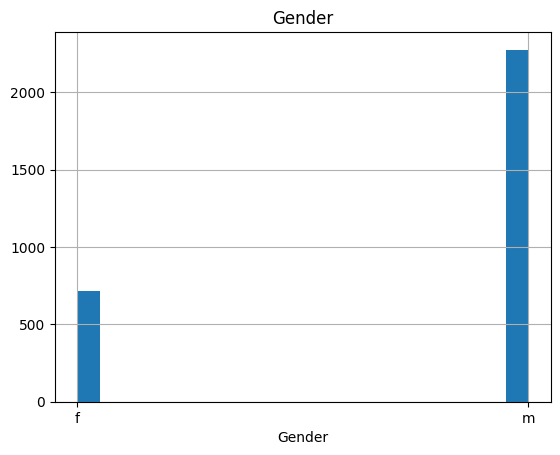

count    2989.000000
mean       77.666243
std         9.995087
min        43.000000
5%         59.000000
10%        64.000000
20%        69.000000
30%        73.000000
40%        76.000000
50%        78.930000
60%        81.500000
70%        84.140000
80%        86.800000
90%        89.800000
95%        91.600000
99%        94.400000
max        97.760000
Name: 10percentage, dtype: float64


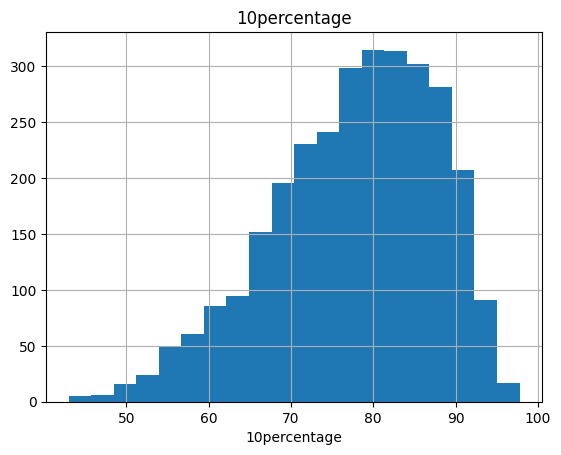

count    2989.000000
mean       74.326193
std        11.122409
min        40.000000
5%         56.000000
10%        60.200000
20%        64.000000
30%        67.840000
40%        71.000000
50%        74.000000
60%        77.132000
70%        81.000000
80%        84.800000
90%        89.800000
95%        93.000000
99%        96.000000
max        98.700000
Name: 12percentage, dtype: float64


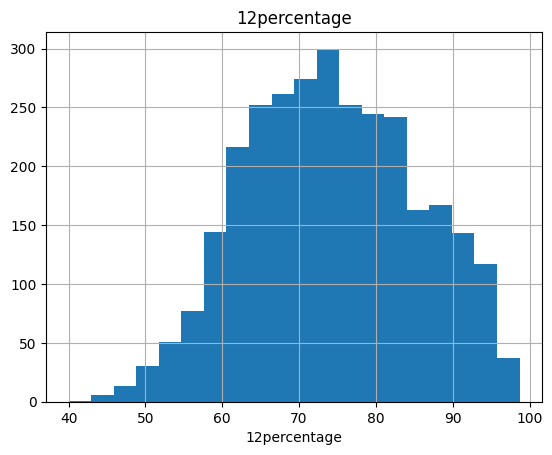

count    2989.000000
mean        1.925059
std         0.263341
min         1.000000
5%          1.000000
10%         2.000000
20%         2.000000
30%         2.000000
40%         2.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         2.000000
95%         2.000000
99%         2.000000
max         2.000000
Name: CollegeTier, dtype: float64


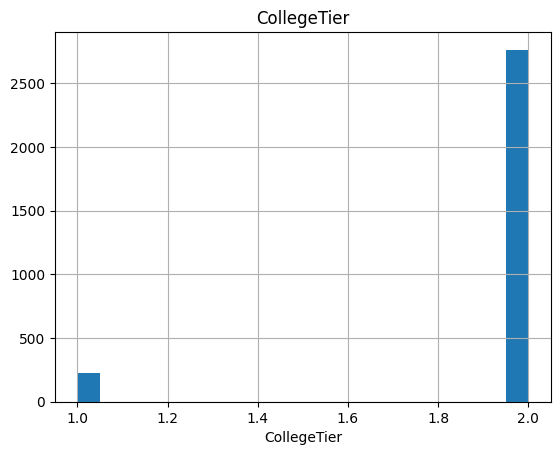

count            2989
unique              4
top       B.Tech/B.E.
freq             2750
Name: Degree, dtype: object


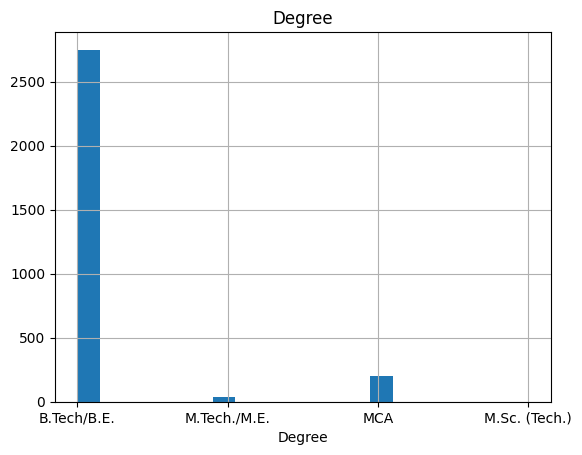

count                                          2989
unique                                           17
top       electronics and communication engineering
freq                                            670
Name: Specialization, dtype: object


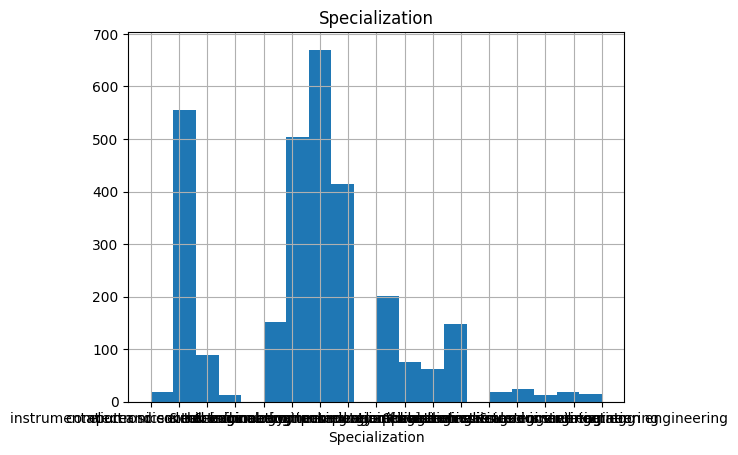

count    2989.000000
mean       71.701435
std         7.344428
min        49.070000
5%         60.062000
10%        62.100000
20%        65.206000
30%        67.770000
40%        70.000000
50%        71.820000
60%        73.460000
70%        75.400000
80%        77.720000
90%        81.000000
95%        84.000000
99%        90.000000
max        99.930000
Name: collegeGPA, dtype: float64


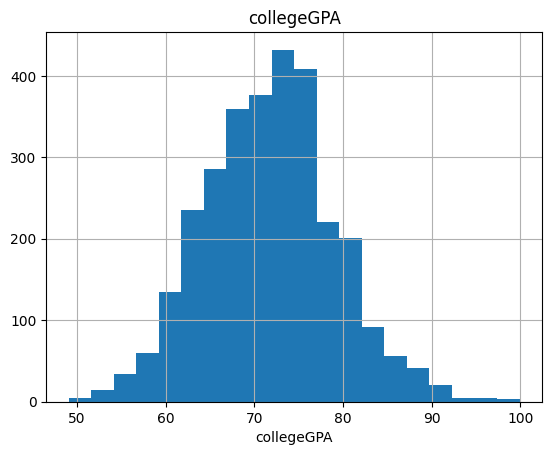

count    2989.000000
mean      501.136501
std       105.368214
min       180.000000
5%        335.000000
10%       365.000000
20%       405.000000
30%       440.000000
40%       475.000000
50%       500.000000
60%       525.000000
70%       555.000000
80%       590.000000
90%       640.000000
95%       675.000000
99%       755.000000
max       875.000000
Name: English, dtype: float64


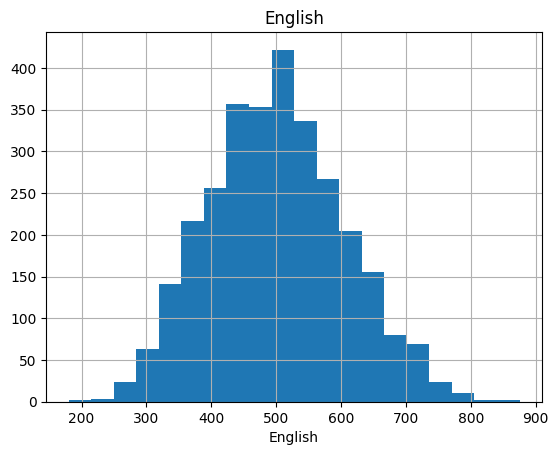

count    2989.000000
mean      500.524925
std        87.125537
min       195.000000
5%        350.000000
10%       385.000000
20%       425.000000
30%       455.000000
40%       480.000000
50%       505.000000
60%       525.000000
70%       555.000000
80%       580.000000
90%       610.000000
95%       640.000000
99%       675.000000
max       795.000000
Name: Logical, dtype: float64


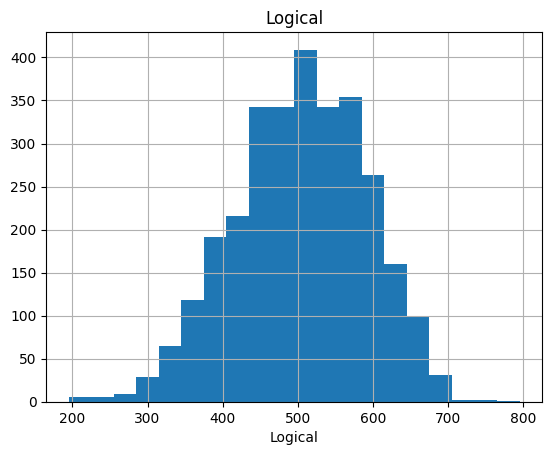

count    2989.000000
mean      514.153898
std       122.021542
min       120.000000
5%        310.000000
10%       355.000000
20%       405.000000
30%       450.000000
40%       485.000000
50%       515.000000
60%       545.000000
70%       575.000000
80%       615.000000
90%       665.000000
95%       715.000000
99%       801.200000
max       900.000000
Name: Quant, dtype: float64


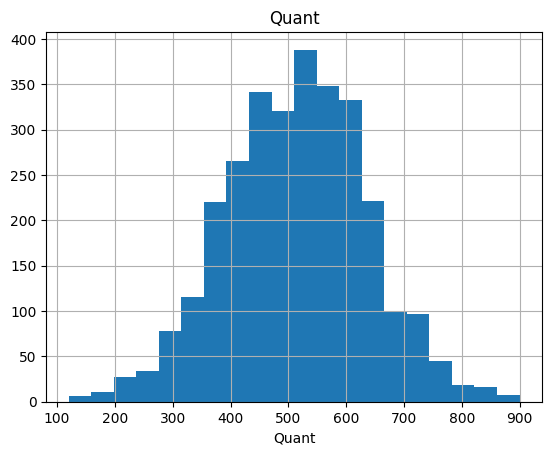

count    2989.000000
mean        0.507995
std         0.463786
min        -1.000000
5%         -1.000000
10%         0.112139
20%         0.245456
30%         0.376060
40%         0.493596
50%         0.622643
60%         0.694479
70%         0.793323
80%         0.864685
90%         0.945135
95%         0.978799
99%         0.996744
max         0.999910
Name: Domain, dtype: float64


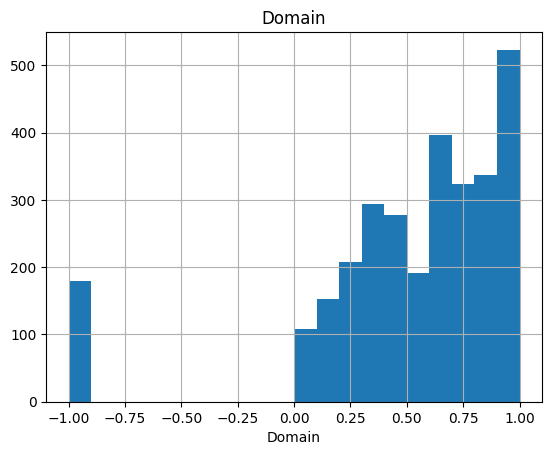

count    2989.000000
mean      352.079291
std       204.350796
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%       335.000000
40%       385.000000
50%       415.000000
60%       445.000000
70%       475.000000
80%       515.000000
90%       555.000000
95%       605.000000
99%       666.200000
max       804.000000
Name: ComputerProgramming, dtype: float64


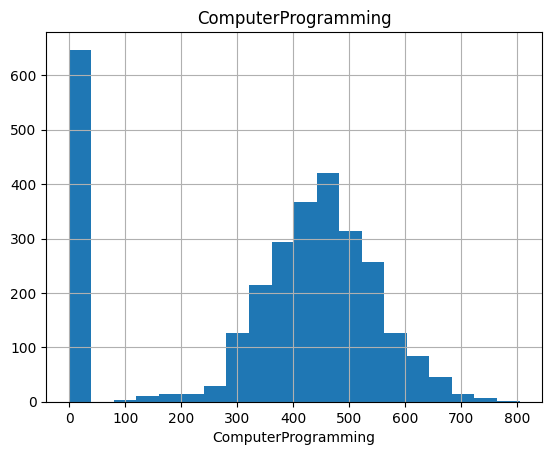

count    2989.000000
mean       96.398126
std       158.820256
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%       292.000000
90%       366.000000
95%       400.000000
99%       500.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64


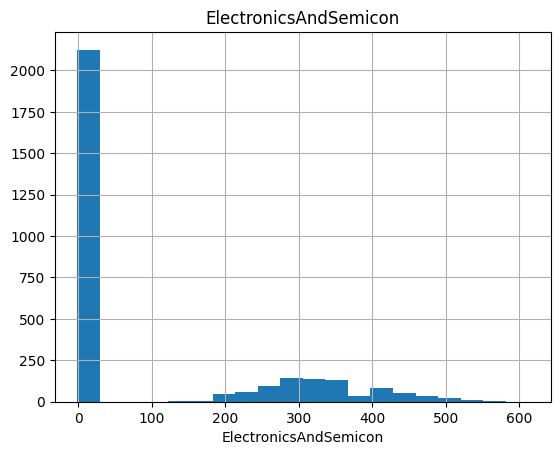

count    2989.000000
mean       94.212111
std       177.883900
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%       315.000000
90%       407.000000
95%       469.000000
99%       564.720000
max       715.000000
Name: ComputerScience, dtype: float64


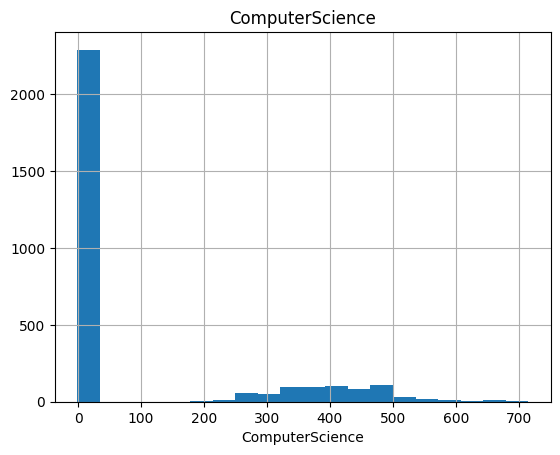

count    2989.000000
mean       23.622951
std        98.747586
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%        -1.000000
90%        -1.000000
95%       332.000000
99%       473.000000
max       623.000000
Name: MechanicalEngg, dtype: float64


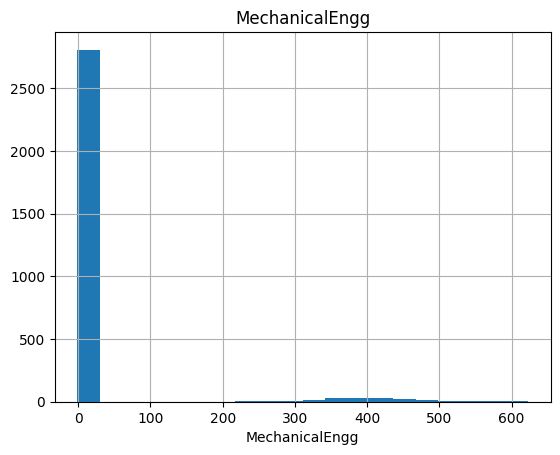

count    2989.000000
mean       16.319839
std        86.179015
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%        -1.000000
90%        -1.000000
95%        -1.000000
99%       474.320000
max       660.000000
Name: ElectricalEngg, dtype: float64


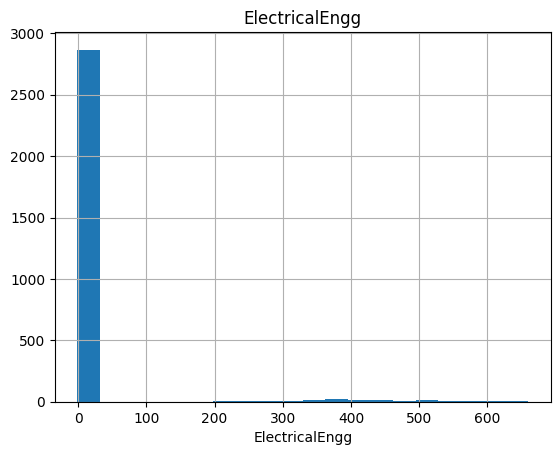

count    2989.000000
mean       31.164938
std       103.693819
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%        -1.000000
90%        -1.000000
95%       340.000000
99%       446.000000
max       548.000000
Name: TelecomEngg, dtype: float64


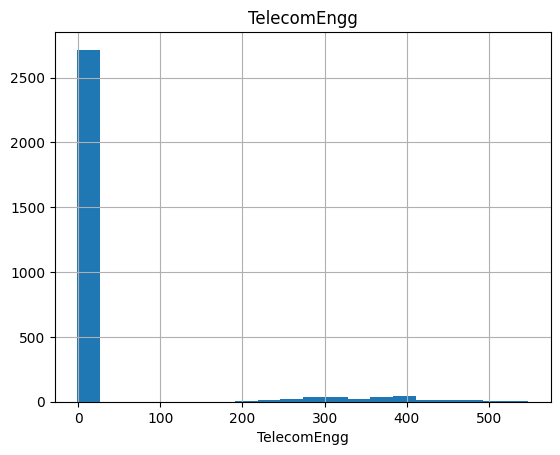

count    2989.000000
mean        1.868518
std        31.942601
min        -1.000000
5%         -1.000000
10%        -1.000000
20%        -1.000000
30%        -1.000000
40%        -1.000000
50%        -1.000000
60%        -1.000000
70%        -1.000000
80%        -1.000000
90%        -1.000000
95%        -1.000000
99%        -1.000000
max       500.000000
Name: CivilEngg, dtype: float64


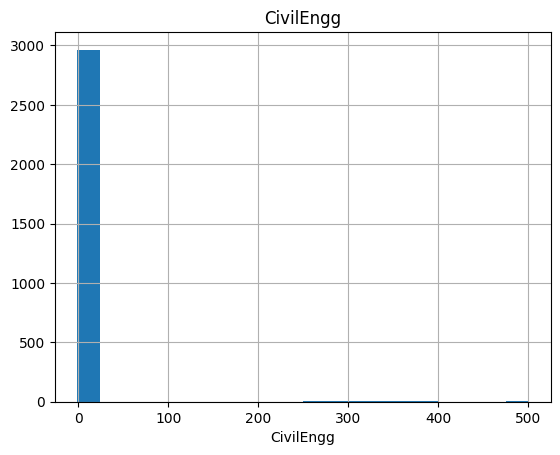

count    2989.000000
mean       -0.039356
std         1.023408
min        -3.893300
5%         -1.808300
10%        -1.451700
20%        -0.877200
30%        -0.446300
40%        -0.262800
50%         0.046400
60%         0.271800
70%         0.559100
80%         0.846300
90%         1.277200
95%         1.437400
99%         1.851700
max         1.995300
Name: conscientiousness, dtype: float64


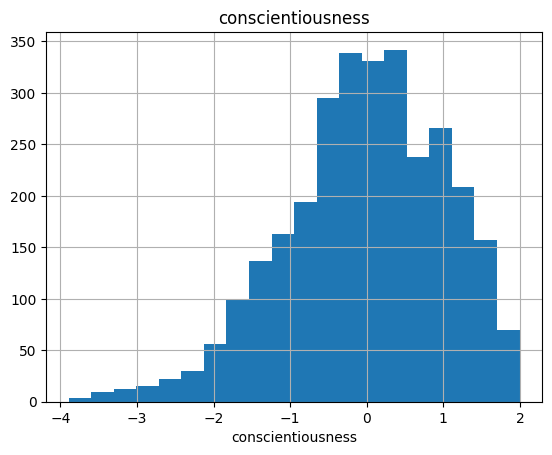

count    2989.000000
mean        0.126508
std         0.955307
min        -5.781600
5%         -1.582380
10%        -1.059300
20%        -0.591300
30%        -0.279300
40%         0.045900
50%         0.212400
60%         0.499320
70%         0.711900
80%         0.878400
90%         1.211400
95%         1.377900
99%         1.710900
max         1.904800
Name: agreeableness, dtype: float64


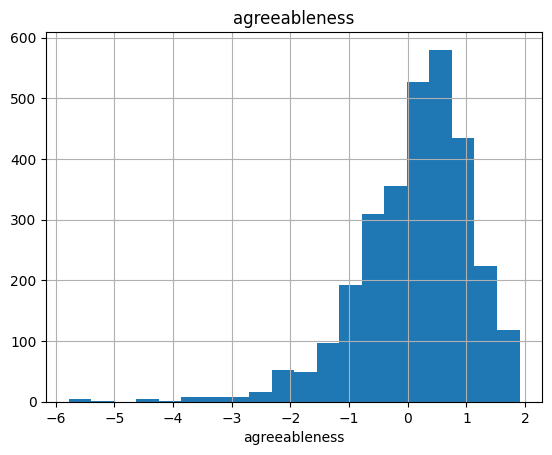

count    2989.000000
mean       -0.008160
std         0.963157
min        -4.600900
5%         -1.680700
10%        -1.219600
20%        -0.779400
30%        -0.451100
40%        -0.162600
50%         0.091400
60%         0.317400
70%         0.526900
80%         0.778500
90%         1.239600
95%         1.397700
99%         1.978200
max         2.161700
Name: extraversion, dtype: float64


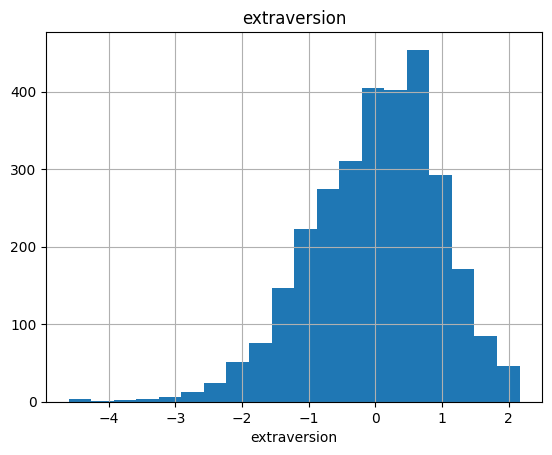

count    2989.000000
mean       -0.145802
std         1.012695
min        -2.643000
5%         -1.755600
10%        -1.465300
20%        -0.995000
30%        -0.741500
40%        -0.437156
50%        -0.172700
60%         0.062300
70%         0.399500
80%         0.767300
90%         1.160100
95%         1.540400
99%         2.294900
max         3.352500
Name: nueroticism, dtype: float64


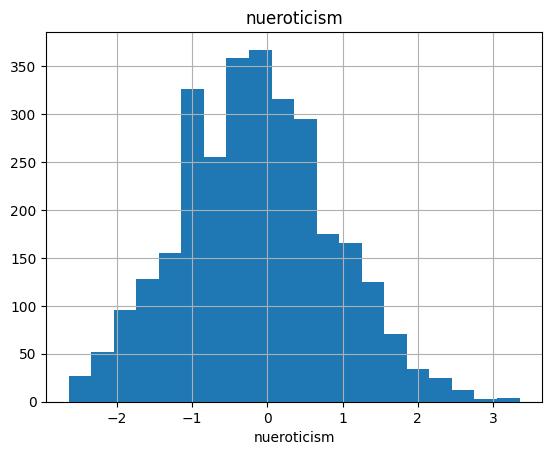

count    2989.000000
mean       -0.141227
std         1.007638
min        -7.375700
5%         -1.818900
10%        -1.244000
20%        -0.860800
30%        -0.477600
40%        -0.285900
50%        -0.094300
60%         0.186400
70%         0.480500
80%         0.672100
90%         0.976300
95%         1.247000
99%         1.608200
max         1.630200
Name: openess_to_experience, dtype: float64


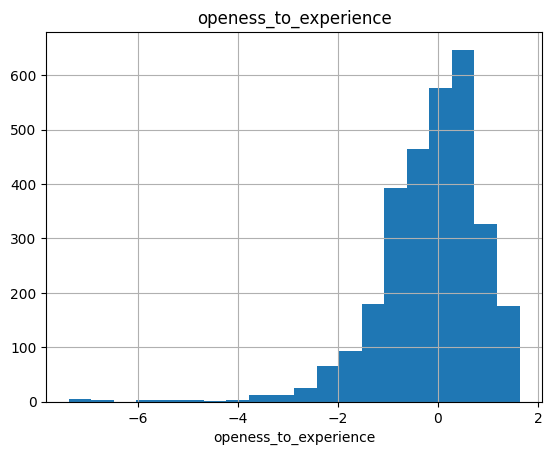

count    2.989000e+03
mean     3.050867e+05
std      2.123479e+05
min      3.500000e+04
5%       1.000000e+05
10%      1.200000e+05
20%      1.800000e+05
30%      2.000000e+05
40%      2.400000e+05
50%      3.000000e+05
60%      3.200000e+05
70%      3.500000e+05
80%      4.000000e+05
90%      4.800000e+05
95%      5.600000e+05
99%      8.824000e+05
max      4.000000e+06
Name: Salary, dtype: float64


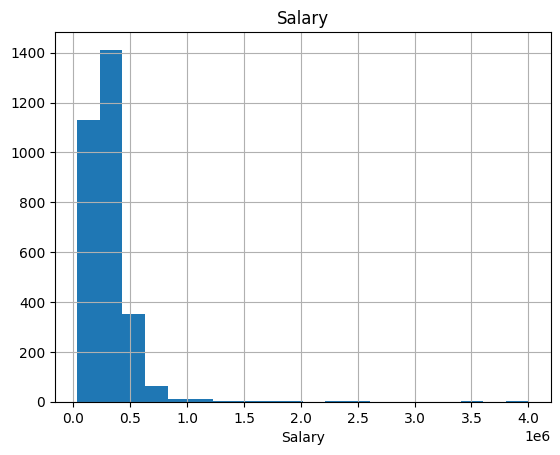

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
        
for col in df:
    num_summary(df, col, plot=True) 

<a id="corr"></a>
## **Correlation between features**

### Relivent question:

> Make a correlation between any proper 2 features to know which feature is depend on other?

### here we can make a correlation relationships between features.

In [ ]:
df.corr()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
10percentage,1.000000,0.647092,-0.143173,0.345947,0.349126,0.308257,0.330035,0.080151,0.053175,0.092636,...,0.051492,0.065947,0.050449,0.022896,0.067450,0.136435,-0.007396,-0.131267,0.034027,0.180407
12percentage,0.647092,1.000000,-0.110689,0.383050,0.211317,0.237327,0.317179,0.073050,0.072396,0.131867,...,0.038090,0.066121,0.055498,0.002435,0.057030,0.099520,-0.012132,-0.088875,0.006520,0.171857
CollegeTier,-0.143173,-0.110689,1.000000,-0.112850,-0.185036,-0.193863,-0.250948,-0.039300,-0.066508,-0.033895,...,-0.026209,0.006174,-0.009536,-0.001570,0.044231,-0.041604,-0.010698,0.034016,-0.027941,-0.175449
collegeGPA,0.345947,0.383050,-0.112850,1.000000,0.105589,0.204384,0.242410,0.110345,0.144841,0.025516,...,-0.000511,0.057105,-0.010416,-0.022813,0.063808,0.064777,-0.060916,-0.076370,0.016189,0.149643
English,0.349126,0.211317,-0.185036,0.105589,1.000000,0.440571,0.374601,0.097523,0.127679,0.020386,...,-0.002701,0.022760,0.001428,-0.025701,0.028953,0.190657,0.006642,-0.147732,0.073021,0.178810
Logical,0.308257,0.237327,-0.193863,0.204384,0.440571,1.000000,0.509078,0.178262,0.179663,0.006202,...,-0.013745,0.008422,-0.005855,-0.019742,0.017979,0.157763,-0.005843,-0.188147,0.048390,0.192844
Quant,0.330035,0.317179,-0.250948,0.242410,0.374601,0.509078,1.000000,0.218334,0.145801,0.123242,...,0.002483,0.028942,0.034382,-0.019005,-0.008725,0.101539,-0.038441,-0.143448,0.024100,0.238025
Domain,0.080151,0.073050,-0.039300,0.110345,0.097523,0.178262,0.218334,1.000000,0.309003,0.092748,...,0.043098,0.035530,0.024734,0.013051,-0.051125,0.039995,-0.032594,-0.026394,-0.000355,0.131879
ComputerProgramming,0.053175,0.072396,-0.066508,0.144841,0.127679,0.179663,0.145801,0.309003,1.000000,-0.355424,...,-0.305020,-0.135663,-0.240535,-0.069843,0.006608,0.072868,0.045913,-0.092777,0.045509,0.133269
ElectronicsAndSemicon,0.092636,0.131867,-0.033895,0.025516,0.020386,0.006202,0.123242,0.092748,-0.355424,1.000000,...,-0.108835,0.026718,0.372599,0.019752,-0.021943,-0.021891,-0.047196,0.012737,-0.008308,-0.008050


**A**nd in this lite section we first just show all correlations between all features.

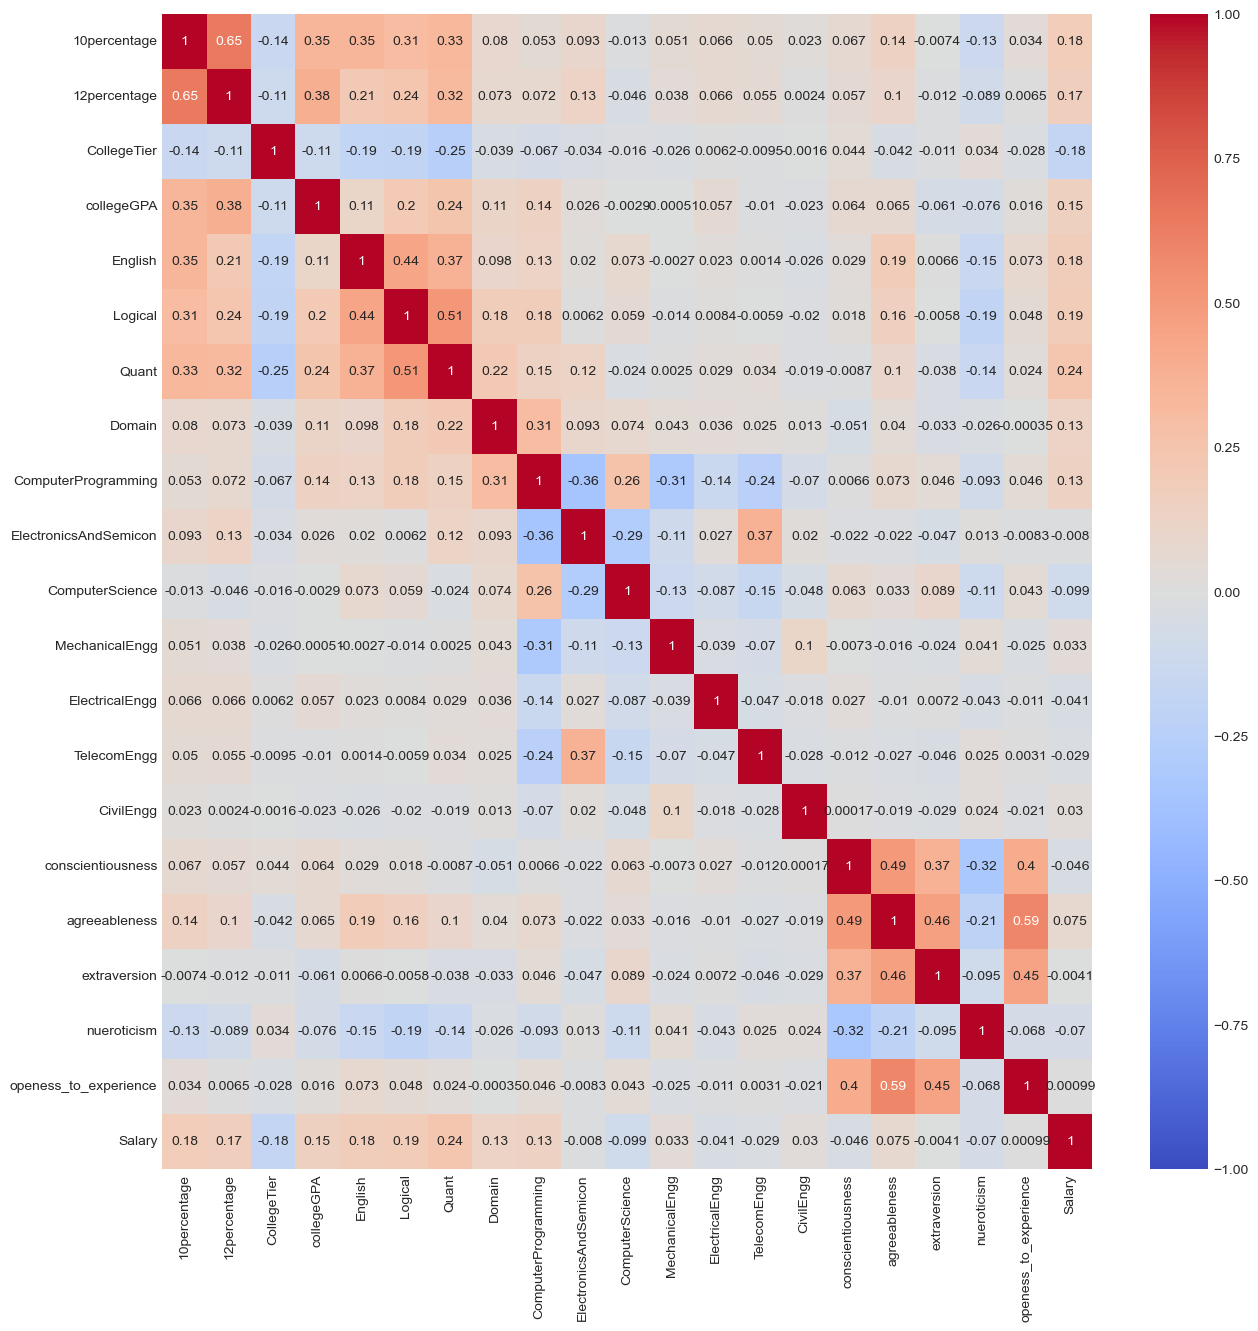

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

<AxesSubplot:>

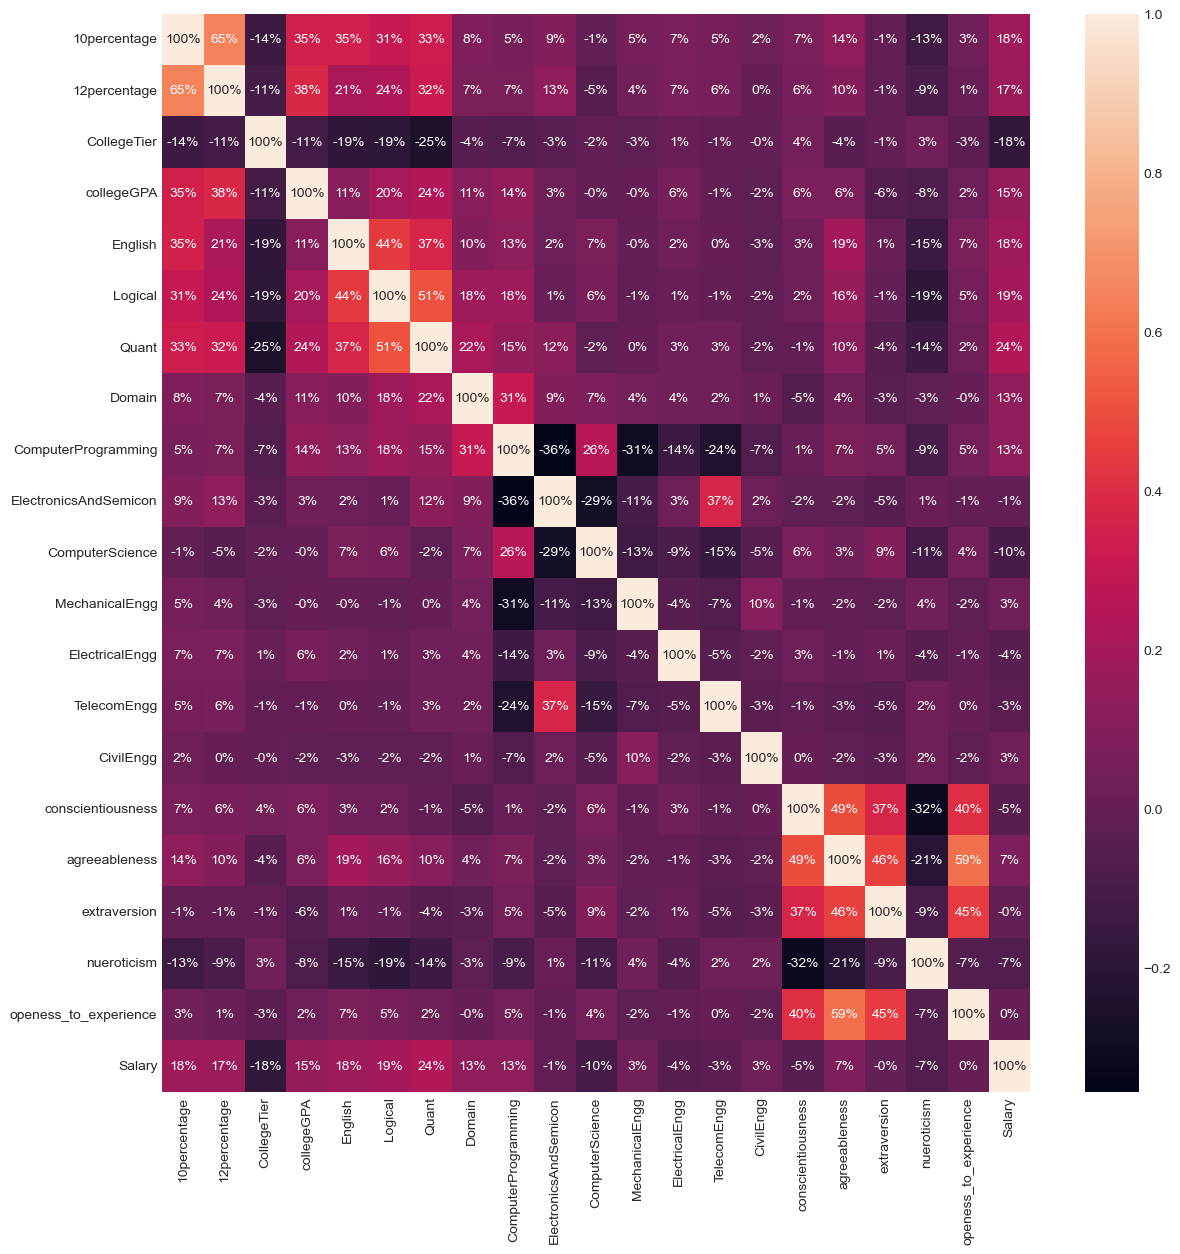

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Degree', ylabel='Specialization'>

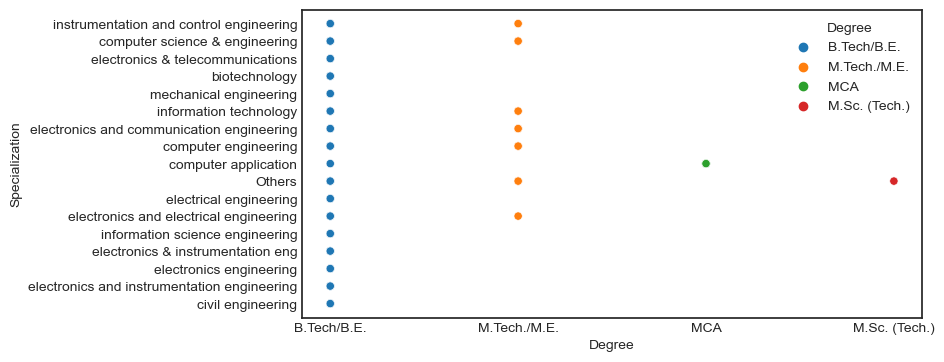

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(df.Degree,df.Specialization, hue = df.Degree)

`Eighth insight:`

All of the above are 2 examples of correlation and we summerize these relations between all features.

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Logical', ylabel='collegeGPA'>

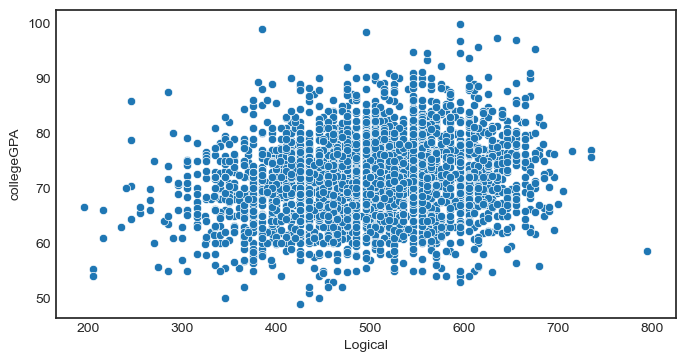

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(df.Logical,df.collegeGPA)


10percentage is highly overall correlated with 12percentage **------>** `High correlation`

12percentage is highly overall correlated with 10percentage	**------>** `High correlation`

Logical is highly overall correlated with Quant	            **------>** `High correlation`

Quant is highly overall correlated with Logical	            **------>**        `High correlation`

Age is highly overall correlated with Graduation_age	   **------>**         `High correlation`

Graduation_age is highly overall correlated with Age	  **------>**          `High correlation`

Degree is highly overall correlated with Specialization	  **------>**          `High correlation`

Specialization is highly overall correlated with Degree	 **------>**           `High correlation`

CollegeTier is highly imbalanced (62.1%)	             **------>**           `Imbalance`

Degree is highly imbalanced (71.7%)	                     **------>**          ` Imbalance`

Graduation_age is highly skewed (γ1 = -53.02021438)	     **------>**           `Skewed`

ComputerProgramming has 564 (20.0%) zeros	             **------>**           `Zeros`

ElectronicsAndSemicon has 1962 (69.6%) zeros	         **------>**           `Zeros`

ComputerScience has 2155 (76.4%) zeros	                 **------>**           `Zeros`

MechanicalEngg has 2634 (93.4%) zeros	                **------>**            `Zeros`

ElectricalEngg has 2698 (95.7%) zeros	                **------>**            `Zeros`

TelecomEngg has 2545 (90.3%) zeros	                    **------>**            `Zeros`

CivilEngg has 2793 (99.1%) zeros	                    **------>**            `Zeros`


<a id="#Machine"></a>
## **`Machine Learning Model`**



>**Tip:** finally our data is ready for performing various of algorithms and models to
>train this data to be fit for any values which are appropirate fot this dataset properties.

### From RobustScaler module

Here, in this section we build a simple regression machine learning model to pridect the salary and 
calculate the score of this operation based on statistics columns that we worked on.

In [ ]:
from sklearn.preprocessing import RobustScaler

Gender, degree, specialization need to be processed as they are of type ‘object’ not suitable for ML model input.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,33,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,12,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,19,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,12,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,4,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


Then, we can try to exclude the columns which are in float not string to avoid exceptions and 
prepare a proper model to reach a high quality.

In [ ]:
col_names = ['10percentage','12percentage','CollegeTier','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']
df = pd.read_csv('./ahsour clean.csv' , header=None, names=col_names)
print("Dimensions of DF: ", df.shape)
print("\nInformation about DF: ")
print(df.info())
print("\nHead of DF: \n", df.head(5))

Dimensions of DF:  (2999, 21)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2999 entries, (nan, 'Gender', '10percentage', '12percentage') to (2997.0, 'm', '77', '75.5')
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   10percentage           0 non-null      float64
 1   12percentage           0 non-null      float64
 2   CollegeTier            0 non-null      float64
 3   collegeGPA             2999 non-null   object 
 4   English                2999 non-null   object 
 5   Logical                2999 non-null   object 
 6   Quant                  2999 non-null   object 
 7   Domain                 2999 non-null   object 
 8   ComputerProgramming    2999 non-null   object 
 9   ElectronicsAndSemicon  2999 non-null   object 
 10  ComputerScience        2999 non-null   object 
 11  MechanicalEngg         2999 non-null   object 
 12  ElectricalEngg         2999 non-null 

In [ ]:
scaler = RobustScaler()
columns=df.columns

In [ ]:
model = scaler.fit(df[columns])
scaled_data = model.transform(df[columns])

In [ ]:
dff=pd.DataFrame(scaled_data,columns=columns)

In [ ]:
y = df["Salary"]
X = dff

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
y_pred

array([ 564999.73317032,  305000.75826964,   65001.94441518,
        180000.07518232,  200000.39029656,  179999.73958751,
        324997.96462753,  329999.1105605 ,  460001.22066073,
        240000.18503325,  110001.84982922,  239999.62251966,
        335000.24726583,  370001.37660287,  180001.15495406,
        310000.9260372 ,   35000.5654087 ,  519998.70285086,
        200000.34039044,  270000.72653945,  239998.88619084,
        369999.71995825,  180002.54294673,  179999.2064182 ,
        180002.97495306,  180001.31379797,  180001.945636  ,
        319999.83384098,  179998.0664145 ,  179999.57207446,
        374999.21465346,  200002.12977905,  359999.23384679,
        300000.83344082,  145001.7914975 ,  275000.1836474 ,
        240001.87419335,  359999.84313399,  145001.80749362,
        420000.91681438,  415001.32863295,  110001.86430807,
        220000.0318645 ,  295002.51671336,  215000.6323253 ,
        425001.47792184,  239997.43921526,   90001.74123799,
        335000.99729323,

In [ ]:
print("Model Score: ", lasso.score(X_test, y_test))

Model Score:  0.9999999999429288


Perfect, an excellent percentage of test score.

It is clear that the data which cleaned, wrangled and visualized is suitable for modeling.

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.7107799041833407

In [ ]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
param_grid = {"alpha": [i*0.1 for i in range(0,30)]}
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Ace

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0, 1.1, 1.2000000000000002, 1.3,
                                   1.4000000000000001, 1.5, 1.6,
                                   1.7000000000000002, 1.8, 1.9000000000000001,
                                   2.0, 2.1, 2.2, 2.3000000000000003,
                                   2.4000000000000004, 2.5, 2.6, 2.7,
                                   2.8000000000000003, 2.9000000000000004]})

In [ ]:
print("Best Parameters:", lasso_cv.best_params_)
print("Best Score:", lasso_cv.best_score_)

Best Parameters: {'alpha': 1.5}
Best Score: 0.9999999999168091


In [ ]:
final_model = lasso.set_params(**lasso_cv.best_params_).fit(X, y)

And ploting the regression line to represent the data.

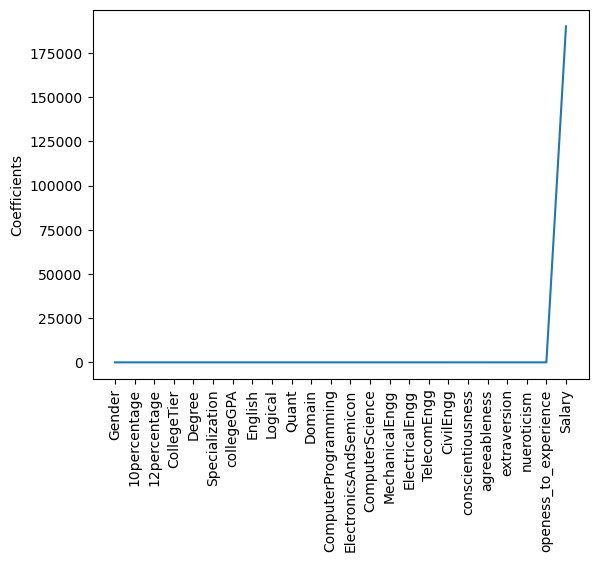

In [ ]:
names =X.columns
plt.plot(range(len(names)), final_model.coef_)
plt.xticks(range(len(names)), names,rotation=90) 
plt.ylabel('Coefficients')
plt.show()

## From sklearn.model_selection module

### LinearRegression

In [ ]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) 
y_pred

array([86.  , 85.  , 74.28, 50.6 , 94.8 , 89.  , 69.92, 88.2 , 76.8 ,
       78.83, 89.7 , 78.4 , 65.2 , 72.  , 78.6 , 83.  , 85.4 , 58.  ,
       80.  , 74.6 , 82.4 , 61.  , 78.  , 79.  , 89.  , 74.3 , 78.  ,
       57.  , 78.4 , 61.  , 82.5 , 69.2 , 67.4 , 54.  , 74.  , 81.6 ,
       66.66, 83.  , 70.66, 78.6 , 88.  , 82.  , 89.  , 82.  , 68.33,
       59.57, 78.5 , 70.5 , 78.  , 91.4 , 87.68, 66.7 , 82.4 , 87.6 ,
       79.  , 85.  , 91.68, 88.  , 62.  , 63.  , 89.  , 69.  , 87.  ,
       84.8 , 75.4 , 78.  , 78.16, 82.  , 90.  , 84.3 , 80.33, 75.6 ,
       96.8 , 58.  , 79.  , 74.6 , 66.  , 77.2 , 90.  , 77.2 , 89.33,
       69.4 , 82.  , 83.8 , 79.6 , 90.  , 88.53, 70.  , 79.  , 73.  ,
       86.9 , 78.  , 81.38, 84.5 , 80.6 , 80.  , 74.5 , 74.  , 83.6 ,
       60.7 , 87.  , 73.8 , 70.2 , 83.6 , 85.  , 80.64, 79.8 , 76.4 ,
       79.6 , 72.75, 58.17, 62.  , 83.6 , 70.  , 55.5 , 80.  , 88.  ,
       75.  , 83.  , 60.  , 90.76, 51.  , 70.  , 75.  , 73.2 , 82.83,
       78.4 , 70.67,

In [ ]:
y_test

array([86.  , 85.  , 74.28, 50.6 , 94.8 , 89.  , 69.92, 88.2 , 76.8 ,
       78.83, 89.7 , 78.4 , 65.2 , 72.  , 78.6 , 83.  , 85.4 , 58.  ,
       80.  , 74.6 , 82.4 , 61.  , 78.  , 79.  , 89.  , 74.3 , 78.  ,
       57.  , 78.4 , 61.  , 82.5 , 69.2 , 67.4 , 54.  , 74.  , 81.6 ,
       66.66, 83.  , 70.66, 78.6 , 88.  , 82.  , 89.  , 82.  , 68.33,
       59.57, 78.5 , 70.5 , 78.  , 91.4 , 87.68, 66.7 , 82.4 , 87.6 ,
       79.  , 85.  , 91.68, 88.  , 62.  , 63.  , 89.  , 69.  , 87.  ,
       84.8 , 75.4 , 78.  , 78.16, 82.  , 90.  , 84.3 , 80.33, 75.6 ,
       96.8 , 58.  , 79.  , 74.6 , 66.  , 77.2 , 90.  , 77.2 , 89.33,
       69.4 , 82.  , 83.8 , 79.6 , 90.  , 88.53, 70.  , 79.  , 73.  ,
       86.9 , 78.  , 81.38, 84.5 , 80.6 , 80.  , 74.5 , 74.  , 83.6 ,
       60.7 , 87.  , 73.8 , 70.2 , 83.6 , 85.  , 80.64, 79.8 , 76.4 ,
       79.6 , 72.75, 58.17, 62.  , 83.6 , 70.  , 55.5 , 80.  , 88.  ,
       75.  , 83.  , 60.  , 90.76, 51.  , 70.  , 75.  , 73.2 , 82.83,
       78.4 , 70.67,

To calculate the coefficient of determination inwhich we can conclude the the best score of model.

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 5.5905502449604685e-14


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 4.767294709529553e-27


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 6.904559877015734e-14


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R² score:', r2)

R² score: 1.0


In [ ]:
r2_percentage = r2 * 100
print('Model accuracy (in percentage):', r2_percentage)

Model accuracy (in percentage): 100.0
